## **Capstone Project Modul 3**

![Bank Wallpaper.png](<attachment:Bank Wallpaper.png>)
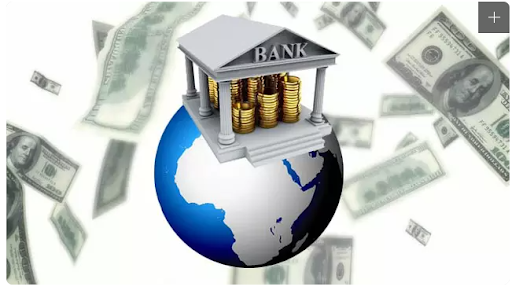

In [80]:
# import library
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

# train test split
from sklearn.model_selection import train_test_split

# impute missing values
from sklearn.impute import SimpleImputer # mean, median, most_frequent (mode), constant
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer # regresi
from sklearn.impute import KNNImputer # regresi KKN

# encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder, BinaryEncoder

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# column transformer & pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# cross validation
from sklearn.model_selection import cross_val_score

# algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# metric
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# ensemble
from sklearn.ensemble import VotingClassifier, StackingClassifier

# Polynomial Features
from sklearn.preprocessing import PolynomialFeatures

# Ensemble Various Type
from sklearn.ensemble import VotingClassifier, StackingClassifier

# Ensemble Similar Type
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier # Begging
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier # Boosting

from sklearn.pipeline import make_pipeline

from sklearn.model_selection import cross_val_score

# import library untuk oversampling
from imblearn.over_sampling import RandomOverSampler, SMOTE

# import library untuk undersampling
from imblearn.under_sampling import RandomUnderSampler, NearMiss



# **Latar Belakang Masalah**

Dalam konteks layanan deposit perbankan, penting bagi perusahaan untuk memahami bahwa setiap langkah dan prosedur yang diambil harus sejalan dengan tujuan mencapai profit. Namun, dalam praktiknya, masalah seringkali muncul yang dapat mengakibatkan pengeluaran tambahan bagi perusahaan. Untuk mengatasi hal ini, perusahaan perlu mencari solusi yang efektif untuk mengelola keuangan mereka dengan baik, dengan fokus pada meminimalisir pengeluaran dan memaksimalkan pemasukan.

Selain itu, penting juga bagi perusahaan untuk dapat melakukan prediksi terhadap perilaku calon nasabah terkait keputusan mereka dalam melakukan deposit. Hal ini akan memberikan wawasan berharga bagi perusahaan untuk merancang strategi yang lebih efektif dalam menarik calon nasabah untuk melakukan deposit dengan perusahaan. Dengan demikian, rekomendasi yang diberikan dalam konteks ini haruslah bertujuan untuk membantu perusahaan dalam mencapai tujuan mereka secara efisien dan efektif.

# **Rumusan Masalah**

**1. Manajemen Pengeluaran Perusahaan:**

Permasalahan utama yang ingin diselesaikan adalah bagaimana mengelola pengeluaran atau biaya operasional terkait dengan keputusan calon nasabah untuk melakukan deposit atau tidak. Dalam hal ini, target stakeholder utama adalah departemen Marketing pada Bank. Mereka bertanggung jawab atas strategi pemasaran dan alokasi anggaran untuk menarik nasabah baru. Pengeluaran tersebut akan dikaji menggunakan Confusion Matrix untuk menguraikan situasi sebagai berikut:

- True Negative (TN): Nasabah yang diprediksi tidak akan melakukan deposit dan memang tidak melakukannya.
- True Positive (TP): Nasabah yang diprediksi akan melakukan deposit dan benar-benar melakukannya.
- False Negative (FN): Nasabah yang diprediksi tidak akan melakukan deposit, tetapi ternyata melakukannya.
- False Positive (FP): Nasabah yang diprediksi akan melakukan deposit, tetapi tidak melakukannya.

Perusahaan telah mengestimasi biaya yang terlibat:

- Biaya marketing untuk nasabah yang diprediksi tidak akan melakukan deposit (FN): $20 per orang.
- Biaya layanan untuk nasabah yang diprediksi akan melakukan deposit (TP): $50 per orang.
- }Penting untuk dicatat bahwa departemen Marketing Bank memiliki kepentingan langsung dalam memahami biaya ini, karena akan memengaruhi alokasi anggaran dan strategi pemasaran mereka. Perusahaan ingin mengetahui biaya mana yang lebih tinggi dalam kondisi FN dan FP, dengan asumsi bahwa sebagian besar biaya lebih tinggi pada FP karena menghasilkan pengeluaran tanpa pemasukan yang sesuai.

**2. Pemilihan Model Machine Learning:**

Selain itu, perusahaan juga perlu memilih model Machine Learning yang tepat untuk memprediksi apakah seorang calon nasabah akan melakukan deposit atau tidak. Prediksi ini akan menjadi dasar bagi departemen Marketing Bank dalam mengelola pengeluaran mereka. Dengan menggunakan model ini, departemen Marketing dapat membuat keputusan yang lebih tepat dalam mengalokasikan dana untuk marketing, meningkatkan layanan deposit, atau bahkan mengevaluasi apakah dana sebaiknya dialokasikan ke area lain. Oleh karena itu, pemilihan model Machine Learning ini juga menjadi perhatian utama bagi departemen Marketing Bank. Dengan memecahkan masalah ini, diharapkan perusahaan dapat mengoptimalkan pengeluaran mereka dan meningkatkan efisiensi operasional secara keseluruhan.

# **Sistematika Penelitian**

Penyelesaian permasalahan ini dapat dibagi menjadi beberapa bagian sebagai berikut:
- **Data Understanding**
    - Merupakan bagian untuk mengetahui isi dari dataset yang diberikan dengan tujuan untuk mengetahui informasi dari data 
- **Data Cleaning**
    - Tahap untuk membersihkan dataset dengan tujuan agar proses analisis dan modeling tidak terganggu oleh Noise yang disebabkan akibat data tidak dilakukan cleaning. Adapun proses dari Data Cleaning dapat diuraikan sebagai berikut.
        - Handling Missing Value
        - Handling Duplicate Data
        - Outliers Checking
        - Handling Ireelevant feature or value
        - Feature Selection
- **Exploratory Data Analysis (EDA)**
    - EDA merupakan tahapan untuk menampilkan insight yang dapat diambil dari data dan dapat dilakukan dengan bantuan dari visualisasi
- **Define Variable**
    - Mendefinisikan variabel X (Feature) dan Y (Target) sebagai prasyarat untuk membuat sebuah model Machine Learning (ML)
- **Data Splitting**
    - Mendefinisikan data training dan testing agar model Machine Learning (ML) dapat mempelajari terlebih dahulu dari data yang ada untuk kemudian model tersebut akan diujikan terhadap data Testing untuk mengetahui seberapa besar akurasi dari model yang dipilih
- **Data Preprocessing**
    - Mempersiapkan data agar data tersebut mampu disediakan untuk melakukan pembuatan model Machine Learning (ML). Adapun bagian dari Data Preprocessing terdiri sebagai berikut
        - Encoding
        - Scaling
        - Binning
        - Handling Missing Value (Optional)
- **Cross Validation**
    - Merupakan tahapan untuk memilih model / algoritma Machine Learning (ML) terbaik berdasarkan metrik / scoring yang digunakan
- **Hyperparameter Tuning**
    - Menentukkan parameter terbaik dari model yang terpilih dari proses Cross Validation sebelumnya
- **Menentukan Threshold terbaik**
    - Threshold merupakan ambang batas yang menentukkan apakah setiap baris data dikategorikan sebagai kelas negatif (0) atau positif (1) pada variabel target. Pada tahapan ini akan menentukkan berapa nilai ambang batas terbaik sehingga nilai Threshold tersebut diharapkan akan meningkatkan akurasi dari model yang dipilih
- **Menampilkan Confusion Matrix**
    - Menampilkan Confusion Matrix bertujuan untuk mengetahui nilai / value dari setiap kondisi yang ada
- **Membandingkan model pada saat sebelum dan sesudah Tuning**
    - Bertujuan untuk mengetahui model mana yang terbaik jika dibandingkan pada saat sebelum dan sesudah dilakukan Tuning. Perbandingan tersebut dapat dilihat dari nilai akurasi dari model pada setiap kondisi. 
- **Feature Importance**
    - Feature Importance merupakan tahapan untuk mengetahui fitur manakah yang berpengaruh signifikan terhadap variabel target

# **Data Understanding**

Berikut merupakan penjelasan dari setiap kolom dalam dataset
- **Age**: Merupakan kolom yang menyimpan informasi tentang usia nasabah.
- **Job**: Mengandung informasi tentang pekerjaan atau profesi dari nasabah.
- **Balance**: Menunjukkan saldo rekening nasabah.
- **Housing**: Berisi informasi apakah nasabah memiliki pinjaman perumahan atau tidak. Nilai "yes" menunjukkan bahwa nasabah memiliki pinjaman perumahan, sedangkan "no" menunjukkan sebaliknya.
- **Loan**: Menyimpan informasi apakah nasabah memiliki pinjaman pribadi atau tidak. "Yes" berarti nasabah memiliki pinjaman pribadi, dan "no" berarti tidak.
- **Contact**: Kolom ini mencatat jenis kontak yang digunakan untuk berkomunikasi dengan nasabah, misalnya, "cellular" (ponsel) atau "telephone" (telepon rumah).
- **Month**: Menyimpan informasi bulan ketika kontak terakhir dilakukan.
- **Campaign**: Merupakan jumlah kontak yang dilakukan selama kampanye pemasaran ini terhadap nasabah.
- **Pdays**: Menyimpan jumlah hari sejak kontak terakhir dilakukan. Jika nasabah belum pernah dihubungi sebelumnya, value nya akan bernilai -1.
- **poutcome**: Menyimpan hasil dari kampanye pemasaran sebelumnya terhadap nasabah.
- **deposit**: Merupakan target atau variabel yang ingin diprediksi, apakah nasabah akan melakukan deposit atau tidak. Nilai "yes" menunjukkan bahwa nasabah melakukan deposit, sedangkan "no" menunjukkan sebaliknya.

# **Import Library**

In [81]:
# import library
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

# train test split
from sklearn.model_selection import train_test_split

# impute missing values
from sklearn.impute import SimpleImputer # mean, median, most_frequent (mode), constant
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer # regresi
from sklearn.impute import KNNImputer # regresi KKN

# encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder, BinaryEncoder

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# column transformer & pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# cross validation
from sklearn.model_selection import cross_val_score

# algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# metric
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# ensemble
from sklearn.ensemble import VotingClassifier, StackingClassifier

# Polynomial Features
from sklearn.preprocessing import PolynomialFeatures

# Ensemble Various Type
from sklearn.ensemble import VotingClassifier, StackingClassifier

# Ensemble Similar Type
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier # Begging
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier # Boosting

from sklearn.pipeline import make_pipeline

# import library untuk oversampling
from imblearn.over_sampling import RandomOverSampler, SMOTE

# import library untuk undersampling
from imblearn.under_sampling import RandomUnderSampler, NearMiss

from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Cross Validation
from sklearn.model_selection import cross_val_score



# **Load Dataset**

In [82]:
df = pd.read_csv('data_bank_marketing_campaign.csv')
df.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no


**Mengubah label pada kolom target (deposit) menjadi bentuk numerik**

Mengubah label pada kolom deposit dengan ketentuan
- deposit "yes" merupakan kelas 1
- deposit "no" merupakan kelas 0

In [83]:
df['deposit'] = np.where(df['deposit'] == "yes", 1, 0)
df.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,1
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,1
2,51,admin.,3025,no,no,cellular,may,1,352,other,1
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,0
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,0


**Mengetahui unique value dari setiap kolom**

Mengetahui unique value dari setiap kolom bertujuan untuk mengindentifikasi apakah terdapat value yang tidak valid dari setiap kolom

In [84]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None) 

def unique_data(df):
    
    data_unique = pd.DataFrame()
    data_unique['Columns'] = df.columns
    data_unique['Unique Count'] = [df[col].nunique() for col in (df.columns)]
    data_unique['Unique'] = [df[col].unique() for col in (df.columns)] 
    return data_unique

unique_data(df)

,Columns,Unique Count,Unique
0,age,75,"[55, 39, 51, 38, 36, 41, 37, 35, 57, 23, 33, 31, 53, 30, 46, 48, 25, 29, 28, 52, 49, 44, 42, 27, 47, 64, 26, 34, 56, 32, 58, 45, 54, 50, 79, 65, 40, 24, 60, 43, 61, 59, 62, 68, 82, 71, 73, 76, 69, 20, 72, 22, 67, 19, 70, 75, 63, 93, 77, 80, 66, 21, 87, 81, 92, 88, 84, 83, 78, 74, 18, 85, 95, 86, 90]"
1,job,12,"[admin., self-employed, services, housemaid, technician, management, student, blue-collar, entrepreneur, retired, unemployed, unknown]"
2,balance,3153,"[1662, -3058, 3025, -87, 205, -76, 4803, 911, 805, 0, 1234, 1107, 1170, 341, 4808, 88, 169, 863, 242, 2597, 4929, 277, 1438, 15, 3733, 204, 1684, 1025, 55, 19, 348, 785, 742, 511, 6651, 1612, 555, 54, 1185, 110, 950, 412, 228, 367, 3993, 2599, 3528, 32, 551, 3161, 533, 8725, 349, 514, 2688, -194, 154, 874, 2, 5953, 1269, -327, 235, 7, 2661, 1948, 20, 502, 193, 13658, 1716, 172, 1667, 157, 8, 951, 427, 241, 469, 2060, 7177, 655, -114, 588, -971, 4570, 250, 131, 93, 22, 15341, 356, 190, -124, 2228, -60, 376, 1567, 855, 4151, ...]"
3,housing,2,"[no, yes]"
4,loan,2,"[no, yes]"
5,contact,3,"[cellular, telephone, unknown]"
6,month,12,"[jun, apr, may, nov, jan, sep, feb, mar, aug, jul, oct, dec]"
7,campaign,32,"[2, 3, 1, 4, 5, 6, 7, 30, 8, 9, 11, 14, 10, 28, 63, 12, 24, 17, 15, 18, 19, 13, 21, 23, 22, 33, 16, 25, 26, 20, 29, 43]"
8,pdays,422,"[-1, 352, 21, 91, 186, 263, 96, 355, 294, 412, 89, 114, 276, 93, 175, 57, 323, 156, 86, 95, 271, 182, 289, 334, 269, 309, 144, 183, 417, 138, 254, 337, 171, 389, 87, 170, 165, 372, 247, 98, 196, 469, 272, 104, 63, 587, 336, 145, 130, 28, 202, 324, 147, 94, 328, 420, 179, 90, 81, 160, 298, 356, 357, 267, 430, 52, 181, 365, 237, 330, 103, 374, 75, 133, 321, 204, 782, 266, 197, 270, 318, 349, 187, 359, 490, 192, 227, 100, 168, 177, 251, 301, 350, 92, 184, 345, 290, 199, 333, 169, ...]"
9,poutcome,4,"[unknown, other, failure, success]"


Insight Unique Value Checking
- Terdapat value 'unknown' dari beberapa kolom seperti job, contact, dan poutcome
- Value tersebut merupakan value yang tidak menggambarkan makna dari ketiga kolom tersebut
- Kemudian pada kolom balance terdapat value yang bernilai negatif. Value tersebut juga tidak valid karena jika dilihat pada data understanding dari kolom balance tersebut merupakan value yang menggambarkan saldo dari setiap nasabah, sedangkan tidak valid jika saldo dari setiap nasabah bernilai negatif
- Maka value tersebut akan dilakukan handling pada proses data cleaning selanjutnya

In [85]:
# Displaying the count of values in the 'deposit' column
deposit_count = df['deposit'].value_counts().reset_index()
deposit_count.columns = ['Deposit', 'Count']

# Displaying the percentage of each value in the 'deposit' column
deposit_percentage = (df['deposit'].value_counts() / len(df['deposit']) * 100).reset_index()
deposit_percentage.columns = ['Deposit', 'Percentage']

# Combine both count and percentage into a single DataFrame
deposit_data = pd.merge(deposit_count, deposit_percentage, on='Deposit')
deposit_data


,Deposit,Count,Percentage
0,0,4081,52.233457
1,1,3732,47.766543


# **Data Cleaning**

## **1. Mengetahui tipe / format dari setiap kolom**

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   int32 
dtypes: int32(1), int64(4), object(6)
memory usage: 641.0+ KB


## **2. Handling terhadap value yang tidak valid dari setiap kolom**

**Melakukan handling pada value yang bernilai negatif pada kolom balance**

In [87]:
df = df[(df['balance'] >= 0)]
df.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,1
2,51,admin.,3025,no,no,cellular,may,1,352,other,1
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,0
6,37,admin.,4803,no,no,cellular,jan,2,-1,unknown,1
7,36,technician,911,yes,yes,cellular,may,2,21,failure,1


**Melakukan handling pada value 'unknown' dari kolom poutcome, contact, dan job**

In [88]:
df = df[df['poutcome'] != 'unknown']

In [89]:
df = df[df['contact'] != 'unknown']

In [90]:
df = df[df['job'] != 'unknown']

**Memastikan kembali tidak terdapat invalid value dari setiap kolom**

In [91]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None) 

def unique_data(df):
    
    data_unique = pd.DataFrame()
    data_unique['Columns'] = df.columns
    data_unique['Unique Count'] = [df[col].nunique() for col in (df.columns)]
    data_unique['Unique'] = [df[col].unique() for col in (df.columns)] 
    return data_unique

unique_data(df)

,Columns,Unique Count,Unique
0,age,70,"[51, 36, 23, 38, 31, 46, 48, 35, 28, 33, 47, 64, 25, 32, 54, 37, 24, 39, 60, 52, 43, 30, 71, 42, 27, 73, 41, 29, 34, 40, 53, 55, 20, 59, 49, 44, 45, 26, 62, 67, 56, 93, 65, 77, 70, 57, 61, 22, 76, 63, 72, 58, 69, 19, 68, 21, 81, 92, 88, 50, 83, 75, 79, 66, 80, 82, 74, 18, 78, 84]"
1,job,11,"[admin., technician, student, management, services, retired, self-employed, blue-collar, housemaid, unemployed, entrepreneur]"
2,balance,1182,"[3025, 911, 1234, 88, 863, 242, 2597, 0, 3733, 348, 6651, 1612, 1185, 367, 533, 349, 2688, 235, 8, 469, 2060, 19, 93, 22, 15341, 193, 1336, 1131, 624, 774, 3943, 425, 175, 2611, 699, 805, 119, 154, 261, 796, 318, 924, 1710, 3340, 341, 1317, 4790, 393, 413, 247, 2595, 6158, 1988, 3236, 2557, 667, 976, 1579, 912, 567, 159, 514, 1824, 224, 497, 21, 7066, 942, 171, 183, 1830, 526, 1279, 2667, 228, 111, 272, 940, 2232, 70, 8876, 1559, 439, 1230, 760, 1852, 30, 718, 994, 236, 781, 668, 294, 3, 733, 1624, 4833, 323, 930, 660, ...]"
3,housing,2,"[no, yes]"
4,loan,2,"[no, yes]"
5,contact,2,"[cellular, telephone]"
6,month,12,"[may, feb, nov, aug, jul, oct, apr, jun, sep, jan, mar, dec]"
7,campaign,10,"[1, 2, 5, 3, 4, 6, 8, 7, 9, 12]"
8,pdays,408,"[352, 21, 91, 186, 263, 96, 355, 294, 412, 89, 114, 276, 93, 175, 57, 323, 156, 86, 95, 271, 182, 289, 334, 269, 309, 144, 183, 138, 254, 337, 171, 389, 87, 170, 165, 372, 247, 98, 196, 469, 272, 104, 63, 587, 336, 145, 130, 28, 202, 324, 147, 94, 328, 420, 179, 90, 81, 298, 356, 357, 267, 430, 52, 181, 365, 237, 330, 103, 374, 75, 133, 321, 204, 266, 197, 270, 318, 349, 187, 359, 490, 192, 227, 100, 168, 177, 251, 301, 350, 92, 184, 345, 290, 199, 333, 169, 474, 13, 136, 99, ...]"
9,poutcome,3,"[other, failure, success]"


## **3. Missing Value**

In [92]:
df.isna().sum()

age         0
job         0
balance     0
housing     0
loan        0
contact     0
month       0
campaign    0
pdays       0
poutcome    0
deposit     0
dtype: int64

Insight
- Tidak terdapat missing value dari setiap kolom dalam dataframe maka tidak perlu melakukan handling pada missing value

## **4. Cek Data yang Berduplikat**

In [93]:
df.duplicated().sum()

0

Insight
- Tidak terdapat data yang terduplikasi maka tidak perlu melakukan handling pada data yang berduplikat dalam dataframe

## **5. Data Formatting**

In [94]:
df.head(5)

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
2,51,admin.,3025,no,no,cellular,may,1,352,other,1
7,36,technician,911,yes,yes,cellular,may,2,21,failure,1
10,23,student,1234,no,no,cellular,feb,1,91,success,1
15,38,technician,88,no,no,cellular,nov,2,186,success,1
18,31,technician,863,yes,no,cellular,feb,1,263,success,0


In [95]:
# Mengetahui format dari setiap kolom dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1899 entries, 2 to 7809
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       1899 non-null   int64 
 1   job       1899 non-null   object
 2   balance   1899 non-null   int64 
 3   housing   1899 non-null   object
 4   loan      1899 non-null   object
 5   contact   1899 non-null   object
 6   month     1899 non-null   object
 7   campaign  1899 non-null   int64 
 8   pdays     1899 non-null   int64 
 9   poutcome  1899 non-null   object
 10  deposit   1899 non-null   int32 
dtypes: int32(1), int64(4), object(6)
memory usage: 170.6+ KB


Insight
- Setiap kolom telah memiliki format / tipe data yang sesuai
- Hal tersebut dapat dilihat dengan menyesuaikan tipe dari setiap kolom dengan isi value dari setiap kolom yang ditampilkan dari dataframe
- Maka tidak perlu dilakukan data formatting dari setiap kolom tersebut

## **6. Outliers**
- Outliers merupakan sebuah data yang memiliki jarak / rentang terjauh dari kumpulan data pada setiap kolom
- Outliers hanya berlaku untuk kolom yang bersifat numerik
- Outliers dapat dilakukan handling atau tidak bergantung dari tujuan penelitian

**Menampilan visualisasi boxplot untuk melihat outliers setiap kolom numerik**

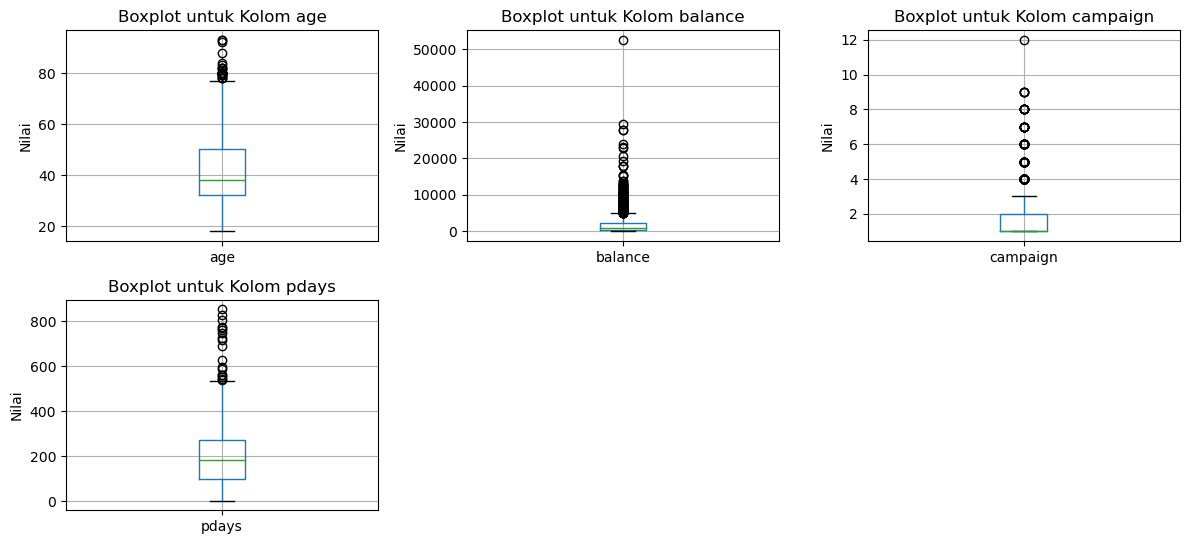

In [96]:
# Memilih kolom numerik dalam DataFrame
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Menampilkan boxplot untuk semua kolom numerik secara terpisah
plt.figure(figsize=(12, 8))
for i, column in enumerate(numeric_columns.columns):
    plt.subplot(3, 3, i+1)
    df.boxplot(column=column)
    plt.title('Boxplot untuk Kolom {}'.format(column))
    plt.ylabel('Nilai')
    plt.grid(True)

plt.tight_layout()
plt.show()

Insight
- Saya memutuskan untuk tidak melakukan handling terhadap outliers dengan tujuan agar tidak menghapus informasi yang dibutuhkan untuk melakukan modeling

## **7. Whitespace**
- Whitespace merupakan sebuah hal yang merujuk pada karakter kosong dalam sebuah string seperti spasi dan sebagainya
- Whitespace dapat diketahui dan dilakukan handling pada kolom yang bersifat kategorik / object
- Data kategorik pada dataframe terdiri dari:
    - job
    - housing
    - loan
    - contact
    - month
    - deposit

In [97]:
# Fungsi untuk memeriksa apakah ada whitespace dalam sebuah string
def contains_whitespace(s):
    return any(x.isspace() for x in str(s))

# Memeriksa whitespace dalam setiap elemen dataframe
whitespace_df = df.applymap(contains_whitespace)

# Menampilkan hasil
print(whitespace_df)

        age    job  balance  housing   loan  contact  month  campaign  pdays  \
2     False  False    False    False  False    False  False     False  False   
7     False  False    False    False  False    False  False     False  False   
10    False  False    False    False  False    False  False     False  False   
15    False  False    False    False  False    False  False     False  False   
18    False  False    False    False  False    False  False     False  False   
19    False  False    False    False  False    False  False     False  False   
20    False  False    False    False  False    False  False     False  False   
23    False  False    False    False  False    False  False     False  False   
26    False  False    False    False  False    False  False     False  False   
32    False  False    False    False  False    False  False     False  False   
36    False  False    False    False  False    False  False     False  False   
37    False  False    False    False  Fa

Insight
- Label False menunjukkan tidak terdapat whitespace dari setiap baris pada masing-masing kolom, sedangkan label True menunjukkan terdapat whitespace dari setiap baris.
- Berdasarkan output tersebut maka tidak terdapat whitespace dari keseluruhan baris pada masing-masing kolom
- Maka tidak perlu dilakukan handling terhadap whitespace dari dataset

# **Exploratory Data Analysis (EDA)**
- EDA merupakan proses untuk menampilkan profil dari dataset yang ada
- EDA dapat meliputi summary statistics, korelasi, visualisasi, dan sebagainya

## **1. Menampilkan Deskriptif Statistik dari Dataset**

In [98]:
df.describe()

,age,balance,campaign,pdays,deposit
count,1899.000000,1899.000000,1899.000000,1899.000000,1899.000000
mean,41.926804,1791.498684,1.895735,199.578726,0.687730
std,13.158089,3028.929152,1.306818,115.352438,0.463541
min,18.000000,0.000000,1.000000,1.000000,0.000000
25%,32.000000,259.000000,1.000000,98.000000,0.000000
50%,38.000000,789.000000,1.000000,182.000000,1.000000
75%,50.000000,2138.500000,2.000000,273.000000,1.000000
max,93.000000,52587.000000,12.000000,854.000000,1.000000


## **2. Korelasi antar Variabel Numerik**

In [99]:
# Mengetahui nilai korelasi dari setiap kolom numerik
df.corr(numeric_only=True)

,age,balance,campaign,pdays,deposit
age,1.000000,0.080337,-0.009759,-0.053013,0.101723
balance,0.080337,1.000000,-0.007797,-0.057231,0.081802
campaign,-0.009759,-0.007797,1.000000,0.062250,-0.115530
pdays,-0.053013,-0.057231,0.062250,1.000000,-0.133148
deposit,0.101723,0.081802,-0.115530,-0.133148,1.000000


In [100]:
# np.triu merupakan function untuk memotong heatmap dengan bentuk segitiga bawah
matrix = np.triu(df.corr(numeric_only=True))

Text(0.5, 1.0, 'Correlation of Numeric Values')

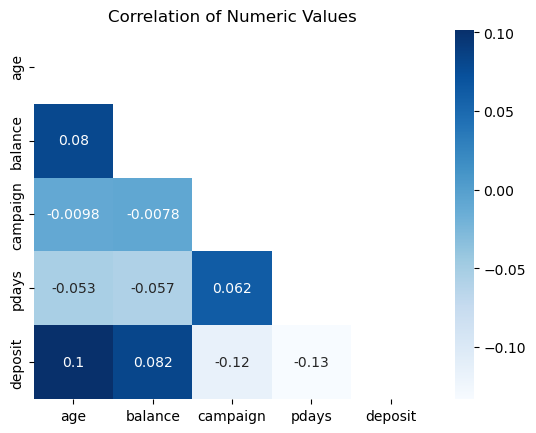

In [101]:
# Melihat heatmap dari semua kolom numerik
sns.heatmap(data=df.corr(numeric_only=True),
            annot=True,
            cmap='Blues',
            mask=matrix
            )

plt.title('Correlation of Numeric Values')

**Insight korelasi**
- Berdasarkan tabel maupun heatmap korelasi dari seluruh variabel numerik dalam dataset maka hampir secara keseluruhan nilai korelasi antar dua variabel numerik menunjukkan angka yang berada di rentang 0 hingga 0.1. Maka dapat diinterpretasikan bahwa nilai korelasi antar kedua variabel numerik yang memiliki nilai dalam rentang tersebut menunjukkan tidak terdapat hubungan yang kuat antar setiap informasi dari dataset deposit perbankan

## **3. Frekuensi setiap Label pada Kolom Target (Deposit)**

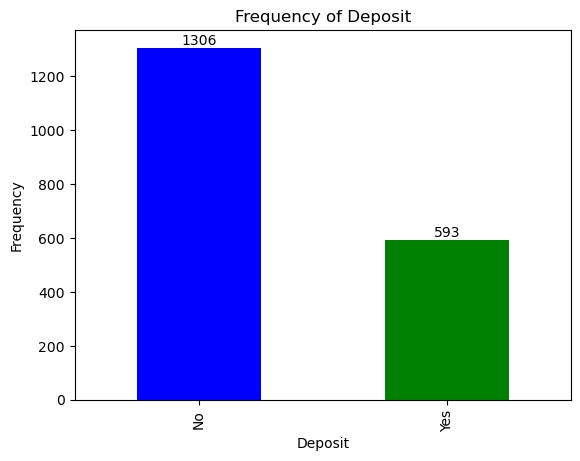

In [102]:
# Menghitung frekuensi setiap label pada kolom 'deposit'
deposit_freq = df['deposit'].value_counts()

# Membuat bar plot
ax = deposit_freq.plot(kind='bar', color=['blue', 'green'])

# Menambahkan judul dan label sumbu
plt.title('Frequency of Deposit')
plt.xlabel('Deposit')
plt.ylabel('Frequency')

# Menambahkan anotasi pada setiap bar
for i, freq in enumerate(deposit_freq):
    ax.text(i, freq, str(freq), ha='center', va='bottom')

# Menambahkan penjelasan label
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

# Menampilkan plot
plt.show()

Insight
- Frekuensi setiap label pada kolom deposit menunjukkan sejumlah 616 nasabah yang tidak melakukan deposit, sedangkan sejumlah 213 nasabah yang melakukan deposit pada Bank
- Frekuensi antar kedua label tersebut sangat berbeda jauh satu sama lain maka kita dapat memutuskan untuk menerapkan metode resampling yang bertujuan untuk melakukan balancing frekuensi antar kedua label tersebut pada saat tahap modeling selanjutnya

# **Define X and y**

- Pendefinisian variabel X dan y merupakan prasyarat untuk melakukan pemodelan machine learning dalam kasus data supervised
- Variabel X merupakan fitur / kolom yang dianggap dapat mempengaruhi hasil dari nilai dari variabel Y sebagai kolom target
- Sedangkan variabel y merupakan kolom yang menjadi target dalam pemodelan machine learning pada kasus data supervised
- Kolom yang akan dipilih untuk menjadi variabel X adalah sebagai berikut
    - age
    - job
    - ballance
    - housing
    - loan
    - contact
    - month
    - campaign
    - pdays
    - poutcome
- Sedangkan kolom yang akan dipilih untuk menjadi variabel y / target adalah kolom deposit

In [103]:
X = df.drop(columns='deposit')
y = df['deposit']

# **Data Splitting**


- Data splitting merupakan tahap membagi dataframe menjadi beberapa bagian yang meliputi kelompok data yang akan berperan sebagai data train dan data test
- Data train merupakan kumpulan data yang akan dipelajari oleh model machine learning agar model tersebut dapat melakukan prediksi ketika mendapatkan data yang baru (terdiri dari x train dan y train)
- Sedangkan data test merupakan kumpulan data yang akan digunakan oleh model machine learning untuk menguji model tersebut (terdiri dari y train dan y test)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X,
                 y,
                 test_size=0.2,
                 random_state=0,
                 stratify=y)

# **Data Preprocessing**
- Data preprocessing merupakan tahap untuk mentransformasi setiap data dari masing-masing kolom menjadi data yang sesuai untuk dilakukan modeling selanjutnya

Data Preprocessing dalam dataset ini akan dibagi menjadi berikut
- **Encoding**
    - Encoding merupakan proses untuk mengubah value kategorik menjadi variabel numerik pada setiap kolom. Hal tersebut dilakukan karena modeling tidak dapat membaca data dalam bentuk kategorik. Tahapan encoding pada dataset ini akan diuraikan sebagai berikut
        - Binary Encoding
            - Binary Encoding dapat dilakukan pada kolom yang memiliki jumlah kategorik yang banyak pada setiap kolom kategorik
            - Kolom kategorik yang akan dilakukan Binary Encoding adalah sebagai berikut
                - job 
                - month
        - One Hot Encoding
            - One Hot Encoding merupakan metode encoding dengan memberi label 1 dan 0 pada setiap kategori dari masing-masing kolom kategorik
            - One Hot Encoding dilakukan pada kolom yang memiliki jumlah kategori sedikit
            - Kolom kategorik yang akan dilakukan One Hot Encoding adalah sebagai berikut
                - housing
                - loan
                - contact
                - poutcome
- **Scaling**
    - Scaling merupakan proses untuk menyetarakan rentang dari setiap kolom numerik. Proses scaling dalam data preprocessing ini akan diuraikan sebagai berikut:
        - Robust Scaling
            - Robust Scaling merupakan metode scaling dengan mengubah nilai median dari setiap kolom numerik menjadi 0 dan nilai Inter Quartil Range (IQR) menjadi 1
            - Robust Scaing merupakan metode scaling yang tidak sensitif terhadap outliers
            - Kolom numerik yang akan dilakukan proses Robust Scaling adalah sebagai berikut:
                - age
                - balance
                - campaign
                - pdays
    

**Mengetahui jumlah kategori dari setiap kolom kategorik**

In [105]:
df.describe(include='object')

,job,housing,loan,contact,month,poutcome
count,1899,1899,1899,1899,1899,1899
unique,11,2,2,2,12,3
top,management,no,no,cellular,may,failure
freq,500,1084,1728,1766,391,792


**Menerapkan data preprocessing**

In [106]:
transformer = ColumnTransformer([
    ('onehot_encoder', OneHotEncoder(), ['housing', 'loan', 'contact','poutcome']),
    ('binary_encoder', BinaryEncoder(), ['job','month']),
    ('fobust_scaling', RobustScaler(), ['age','balance','campaign','pdays'])
], remainder='passthrough')

# **Cross Validation**

- Cross validation merupakan metode untuk menentukkan model machine learning terbaik berdasarkan skor dari metrik yang dipilih
- Semakin tinggi skor metrik dari setiap model maka semakin baik model tersebut untuk dilakukan pemodelan selanjutnya

## **1. Mendefinisikan seluruh model machine learning**

In [107]:
# Bagging
bagging = BaggingClassifier(random_state=0, estimator = KNeighborsClassifier())

# Random Forest
rf = RandomForestClassifier(random_state=0)

# Ada Boosting
adaboost = AdaBoostClassifier(random_state=0)

# Gradient Boosting
gboost = GradientBoostingClassifier(random_state=0)

# define algo
logreg = LogisticRegression(random_state=0)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=0)

In [108]:
# Voting Classifer
voting = VotingClassifier([
    ('clf1', logreg),
    ('clf2', knn),
    ('clf3', tree)
])

# Stacking Classifier
stacking = StackingClassifier(estimators= [
    ('clf1', logreg),
    ('clf2', knn),
    ('clf3', tree)],
    final_estimator= logreg)

## **2. Pemilihan model terbaik dengan cross validation**

In [109]:
# Cross Validation
models = [logreg, knn, tree, voting, stacking, bagging, rf, adaboost, gboost]
list_all_precision = []
list_mean_precision = []
list_std_precision = []


for i in models:
# pipe_model 
    pipe_model = Pipeline([
        ('preprocessing', transformer),
        ('modeling', i)
    ])
    cv_score = cross_val_score(
        estimator=pipe_model,
        X = X_train,
        y = y_train,
        cv = 5,
        scoring ='precision'
    )
    list_all_precision.append(cv_score.round(2))
    list_mean_precision.append(cv_score.mean())
    list_std_precision.append(cv_score.std())

In [110]:
# menampilkan dataframe yang berisikan urutan algoritma terbaik berdasarkan skor, mean, dan standar deviasi dari metrik precision
df_cv = pd.DataFrame()
df_cv['algo'] = models
df_cv['all_precision']= list_all_precision
df_cv['mean_precision'] = list_mean_precision
df_cv['std_precision'] = list_std_precision

df_cv.sort_values(by='mean_precision',ascending=False)

,algo,all_precision,mean_precision,std_precision
6,RandomForestClassifier(random_state=0),"[0.83, 0.82, 0.81, 0.81, 0.83]",0.819542,0.006795
8,GradientBoostingClassifier(random_state=0),"[0.83, 0.83, 0.78, 0.82, 0.82]",0.816122,0.020401
3,"VotingClassifier(estimators=[('clf1', LogisticRegression(random_state=0)),\n ('clf2', KNeighborsClassifier()),\n ('clf3', DecisionTreeClassifier(random_state=0))])","[0.8, 0.82, 0.79, 0.8, 0.83]",0.811898,0.014328
0,LogisticRegression(random_state=0),"[0.81, 0.81, 0.78, 0.81, 0.84]",0.811885,0.016186
5,"BaggingClassifier(estimator=KNeighborsClassifier(), random_state=0)","[0.81, 0.82, 0.81, 0.81, 0.81]",0.811660,0.004959
7,AdaBoostClassifier(random_state=0),"[0.82, 0.81, 0.78, 0.81, 0.82]",0.807312,0.013206
4,"StackingClassifier(estimators=[('clf1', LogisticRegression(random_state=0)),\n ('clf2', KNeighborsClassifier()),\n ('clf3',\n DecisionTreeClassifier(random_state=0))],\n final_estimator=LogisticRegression(random_state=0))","[0.81, 0.8, 0.78, 0.81, 0.82]",0.805869,0.016028
1,KNeighborsClassifier(),"[0.78, 0.81, 0.8, 0.81, 0.82]",0.805186,0.014031
2,DecisionTreeClassifier(random_state=0),"[0.79, 0.78, 0.78, 0.79, 0.75]",0.776537,0.015648


## **3. Cara kerja algoritma Random Forest**

**Definisi algoritma random forest**

Algoritma Random Forest adalah salah satu algoritma machine learning yang termasuk dalam kategori ensemble learning, khususnya bagging. Ensemble learning adalah teknik yang menggabungkan beberapa model pembelajaran untuk membuat prediksi yang lebih baik daripada model tunggal.

**Langkah kerja algoritma random forest**

Berikut adalah cara kerja algoritma Random Forest secara umum:

**1. Pemilihan Sampel**
- Langkah pertama dalam pembuatan Random Forest adalah memilih sampel acak dari dataset yang ada dengan penggantian. Ini berarti setiap pohon (estimator) dalam hutan akan dibangun dari sampel yang diambil secara acak dari dataset, dan setiap sampel bisa muncul lebih dari satu kali dalam satu pohon.

**2. Pembangunan Pohon**
- Setelah sampel terpilih, sebuah pohon keputusan dibangun pada setiap sampel dengan menggunakan teknik seperti algoritma CART (Classification and Regression Trees). Pohon ini akan dibangun sampai mencapai batasan yang ditetapkan sebelumnya, misalnya kedalaman pohon maksimum atau jumlah sampel minimum di setiap leaf.

**3. Pemilihan Fitur** 
- Saat membangun setiap pohon, algoritma Random Forest akan memilih subset fitur secara acak. Ini membantu untuk mencegah pohon-pohon dalam hutan menjadi terlalu serupa satu sama lain dan memperkenalkan keragaman tambahan ke dalam model.

**4. Prediksi** 
- Setelah semua pohon dibangun, prediksi dilakukan dengan mengumpulkan prediksi dari setiap pohon dan menggunakan suara mayoritas (untuk klasifikasi) atau rata-rata (untuk regresi) untuk menentukan prediksi akhir.

Manfaat utama dari algoritma Random Forest adalah kehandalannya dalam mengatasi overfitting karena penggunaan banyak pohon yang saling independen. Selain itu, Random Forest juga mampu menangani data yang tidak seimbang dengan baik. Kelemahannya termasuk interpretabilitas yang lebih rendah dibandingkan dengan pohon keputusan tunggal dan kemungkinan kesulitan dalam menangani data yang memiliki banyak fitur kategorikal.

**Parameter dalam algoritma random forest**

Berikut adalah penjelasan singkat tentang cara kerja algoritma Random Forest beserta parameter-parameter utamanya:

**1. n_estimators**
- n_estimators adalah jumlah pohon keputusan yang ingin Anda bangun dalam ensemble. Semakin banyak pohon yang Anda tambahkan, semakin rumit modelnya dan semakin lama waktu pelatihannya. Biasanya, semakin banyak pohon, semakin baik kinerjanya sampai titik tertentu.

**2. max_depth**
- max_depth merupakan kedalaman maksimum yang diperbolehkan untuk setiap pohon keputusan dalam ensemble. Meningkatkan kedalaman maksimum dapat membuat model lebih kompleks dan memungkinkan untuk menangkap hubungan yang lebih rumit dalam data pelatihan. Namun, ini juga dapat menyebabkan overfitting, di mana model terlalu cocok dengan data pelatihan dan tidak dapat menggeneralisasi dengan baik pada data uji.

**3. min_samples_split**
- min_samples_split adalah jumlah minimum sampel yang diperlukan untuk membagi simpul dalam pembangunan pohon. Jika jumlah sampel di sebuah simpul kurang dari nilai ini, pembagian simpul tidak akan terjadi. Menggunakan nilai yang lebih tinggi dapat membantu mencegah overfitting dengan mencegah pembagian yang terlalu spesifik pada data pelatihan.

**4. min_samples_leaf**
- min_samples_leaf adalah jumlah minimum sampel yang diperlukan untuk menjadi daun (simpul terminal) dalam pembangunan pohon. Jika jumlah sampel di sebuah simpul daun kurang dari nilai ini, simpul tersebut tidak akan dipecah lagi. Menggunakan nilai yang lebih tinggi dapat membantu mencegah overfitting dengan mencegah pohon tumbuh terlalu dalam dan terlalu beradaptasi dengan data pelatihan.

**5. bootstrap**
- bootstrap adalah parameter boolean yang menentukan apakah sampel bootstrap akan digunakan saat membangun pohon keputusan. Jika disetel ke True, setiap pohon akan dilatih pada sampel bootstrap dari data pelatihan, yang berarti beberapa sampel dapat muncul beberapa kali dalam setiap pohon. Penggunaan bootstrap membantu membuat variasi antara pohon-pohon dalam ensemble, yang mengarah pada generalisasi yang lebih baik.

# **Hyperparameter Tuning**

## **1. Mengetahui Parameter dan Metode Resampling Terbaik pada Model berdasarkan Hyperparameter Tuning**

**Pengertian setiap metode resampling**

Resampling adalah teknik yang digunakan dalam analisis statistik untuk membuat ulang sampel dari dataset yang ada. Tujuan utama dari resampling adalah untuk menghasilkan distribusi ulang dari data yang ada dengan tujuan tertentu, seperti memperoleh perkiraan yang lebih akurat tentang parameter populasi, menguji keandalan dari model statistik, atau menangani ketidakseimbangan kelas dalam dataset.

Berikut merupakan jenis metode dari resampling

**1. SMOTE (Synthetic Minority Over-sampling Technique)**
- SMOTE adalah metode resampling yang digunakan untuk menangani ketidakseimbangan kelas dalam dataset. Ini bekerja dengan membuat sampel sintetis baru untuk kelas minoritas dengan cara mengambil contoh dari tetangga terdekat dalam ruang fitur. Dengan demikian, SMOTE membantu mengatasi masalah ketidakseimbangan kelas dengan meningkatkan jumlah sampel untuk kelas minoritas.

**2. NearMiss**
- NearMiss adalah metode resampling yang digunakan untuk menangani ketidakseimbangan kelas dengan mengurangi jumlah sampel dari kelas mayoritas. Ini dilakukan dengan cara menghapus sampel-sampel dari kelas mayoritas yang memiliki jarak terdekat dengan sampel-sampel dari kelas minoritas. Tujuan utamanya adalah untuk memastikan bahwa kelas mayoritas dan kelas minoritas memiliki proporsi yang lebih seimbang.

**3. Oversampling**
- Oversampling adalah pendekatan resampling yang bertujuan untuk menyeimbangkan kelas dalam dataset dengan meningkatkan jumlah sampel untuk kelas minoritas. Ini dilakukan dengan cara menggandakan atau menambahkan kembali sampel-sampel dari kelas minoritas sehingga proporsi antara kelas minoritas dan mayoritas menjadi lebih seimbang.

**4. Undersampling**
- Undersampling adalah pendekatan resampling yang bertujuan untuk menyeimbangkan kelas dalam dataset dengan mengurangi jumlah sampel dari kelas mayoritas. Ini dilakukan dengan cara menghapus sebagian sampel dari kelas mayoritas sehingga proporsi antara kelas minoritas dan mayoritas menjadi lebih seimbang.

**Mendefinisikan komponen hyperparameter tuning**

In [111]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import RandomizedSearchCV

# Definisikan hyperparameter untuk metode resampling
resampling_hyperparam = {
    'resampling': [RandomUnderSampler(sampling_strategy='auto'), RandomOverSampler(sampling_strategy='auto'), SMOTE(sampling_strategy='auto')]
}

# Definisikan hyperparameter untuk model lainnya
model_hyperparam = {
    'modeling__n_estimators': range(50, 200),
    'modeling__max_depth': [None] + list(range(5, 30)),
    'modeling__min_samples_split': range(2, 20),
    'modeling__min_samples_leaf': range(1, 20),
    'modeling__bootstrap': [True, False]
}

# Gabungkan hyperparameter untuk metode resampling dan model
hyperparam = {**resampling_hyperparam, **model_hyperparam}

# pipeline prep dan modeling dengan Random Under Sampling
pipe_model_rf = Pipeline([
    ('prep', transformer),
    ('resampling', RandomUnderSampler(sampling_strategy='auto')),
    ('modeling', rf)
])

# Tuning dengan Random Under Sampling
random_search_rf = RandomizedSearchCV(
    estimator=pipe_model_rf,
    param_distributions=hyperparam,
    cv=5,
    scoring='precision',
    n_jobs=-1,
    n_iter=100,
    error_score='raise'
)

# Lakukan proses tuning
random_search_rf.fit(X_train, y_train)


RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=Pipeline(steps=[('prep',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot_encoder',
                                                                               OneHotEncoder(),
                                                                               ['housing',
                                                                                'loan',
                                                                                'contact',
                                                                                'poutcome']),
                                                                              ('binary_encoder',
                                                                               BinaryEncoder(),
                                                                               ['job',
                                                                                'month']),
                                                                              ('fobust_scaling',
                                                                               RobustScaler(),
                                                                               ['age',
                                                                                'balance',
                                                                                'campaign',
                                                                                'pdays'])])),
                                             ('resampling',
                                              Ra...
                   param_distributions={'modeling__bootstrap': [True, False],
                                        'modeling__max_depth': [None, 5, 6, 7,
                                                                8, 9, 10, 11,
                                                                12, 13, 14, 15,
                                                                16, 17, 18, 19,
                                                                20, 21, 22, 23,
                                                                24, 25, 26, 27,
                                                                28, 29],
                                        'modeling__min_samples_leaf': range(1, 20),
                                        'modeling__min_samples_split': range(2, 20),
                                        'modeling__n_estimators': range(50, 200),
                                        'resampling': [RandomUnderSampler(),
                                                       RandomOverSampler(),
                                                       SMOTE()]},
                   scoring='precision')

**Menampilkan parameter beserta metode resampler terbaik berdasarkan hyperparameter tuning pada model / algoritma yang dipilih dari hasil cross validation (random forest)**

In [112]:
# Menampilkan hasil parameter terbaik
print("Best Parameters:", random_search_rf.best_params_)

# Menampilkan resampler terbaik
print("Best Resampler:", random_search_rf.best_estimator_.named_steps['resampling'])

Best Parameters: {'resampling': RandomUnderSampler(), 'modeling__n_estimators': 108, 'modeling__min_samples_split': 2, 'modeling__min_samples_leaf': 4, 'modeling__max_depth': 18, 'modeling__bootstrap': False}
Best Resampler: RandomUnderSampler()


Insight
- Berdasarkan proses hyperparameter tuning maka parameter terbaik pada model / algoritma random forest dapat diuraikan sebagai berikut
    - n_estimators = 135
    - min_samples_split = 14
    - min_samples_leaf = 12
    - max_depth = 9
    - bootstrap = False
    - metode resampling = random under sampling

## **2. Membandingkan Model Sebelum dan Sesudah dilakukan Tuning**

In [113]:
from sklearn.metrics import f1_score, precision_score, confusion_matrix, ConfusionMatrixDisplay,classification_report

Nilai akurasi pada model sebelum dilakukan Hyperparameter Tuning lebih besar dari nilai akurasi model setelah dilakukan Hyperparameter Tuning. Maka kita akan menggunakan model tanpa dilakukan Hyperparameter Tuning untuk melakukan proses selanjutnya

In [114]:
estimator=Pipeline([
    ('preprocess',transformer),
    ('model', rf)
])
estimator.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot_encoder',
                                                  OneHotEncoder(),
                                                  ['housing', 'loan', 'contact',
                                                   'poutcome']),
                                                 ('binary_encoder',
                                                  BinaryEncoder(),
                                                  ['job', 'month']),
                                                 ('fobust_scaling',
                                                  RobustScaler(),
                                                  ['age', 'balance', 'campaign',
                                                   'pdays'])])),
                ('model', RandomForestClassifier(random_state=0))])

In [115]:
# Model sebelum Tuning
model = Pipeline([
    ("preprocessing", transformer),
    ("model", rf)
])

model.fit(X_train, y_train)
y_pred_before = model.predict(X_test)

# menampilkan skor metrik pada model sebelum dilakukan tuning
y_pred_before = model.predict(X_test)
precision_score(y_test, y_pred_before)

0.8239700374531835

In [116]:
# mendefinisikan model setelah dilakukan tuning
best_model = random_search_rf.best_estimator_

# fitting -> Train only
best_model.fit(X_train, y_train)

# predict -> X_test
y_pred_after = best_model.predict(X_test)

# menampilkan skor metrik pada model setelah dilakukan tuning
precision_score(y_test, y_pred_after)

0.883177570093458

In [117]:
print("Nilai akurasi model sebelum dilakukan Tuning :", precision_score(y_test, y_pred_before))
print("Nilai akurasi model setelah dilakukan Tuning :", precision_score(y_test, y_pred_after))

Nilai akurasi model sebelum dilakukan Tuning : 0.8239700374531835
Nilai akurasi model setelah dilakukan Tuning : 0.883177570093458


# **Threshold Terbaik**

- Threshold merupakan ambang batas untuk menentukkan sejauh mana keseluruhan data dapat membedakan label satu dengan lainnya pada kolom target

In [118]:
# mendefinisikan model terbaik
best_model =  random_search_rf.best_estimator_

# Use the best model to make predictions on the test set
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Set your desired threshold
threshold = 0.5

# Apply the threshold to get binary predictions
y_pred = (y_pred_proba > threshold).astype(int)

**Menentukkan nilai threshold terbaik berdasarkan skor metrik precision**

In [119]:
# mendefinisikan model yang akan diindentifikasi threshold terbaiknya
y_pred = best_model.predict(X_test)

# Membuat list threshold
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
results = []

for threshold in thresholds:
    y_pred_threshold = (y_pred_proba > threshold).astype(int)
    precision = precision_score(y_test, y_pred_threshold)
    results.append({'Threshold': threshold, 'Precision': precision})

precision_df = pd.DataFrame(results)

# Mengurutkan skor metrik precision dari yang tertinggi
sorted_precision_df = precision_df.sort_values(by='Precision', ascending=False)

# Display the sorted DataFrame
sorted_precision_df


,Threshold,Precision
7,0.8,0.935897
8,0.9,0.920000
6,0.7,0.917910
5,0.6,0.910112
4,0.5,0.883178
3,0.4,0.846473
2,0.3,0.808511
1,0.2,0.745399
0,0.1,0.699187


In [120]:
# Melakukan indexing terhadap dataframe list threshold sebelumnya untuk menampilkan nilai threshold terbaik beserta skor metrik precision nya
best_threshold_row = sorted_precision_df.iloc[0]
best_threshold = best_threshold_row['Threshold']
best_precision = best_threshold_row['Precision']

# Menampilkan nilai threshold terbaik beserta skor metrik precision berdasarkan dataframe yang telah dibentuk sebelumnya
print("Best Threshold:", best_threshold)
print("Corresponding Precision:", best_precision)


Best Threshold: 0.8
Corresponding Precision: 0.9358974358974359


Insight
- Berdasarkan proses yang telah dilakukan maka dapat ditentukkan bahwa nilai ambang batas terbaik adalah 0.8 dengan skor metrik precision sebesar 0.93
- Maka kita dapat menggunakan model dengan threshold 0.8 tersebut untuk dilakukan analisa selanjutnya

# **Confusion Matrix**

- Confusion matrix merupakan matrix yang dapat menampilkan nilai dari setiap komponen seperti False Negative (FN), False Positive (FP), True Negative (TN), dan True Positive (TP)
- Dalam pemahaman business, onfusion matrix memiliki salah satu tujuan yaitu untuk mengetahui biaya yang dikeluarkan dari setiap komponen dalam confusion matrix

## **1. Confusion Matrix sebelum Tuning**

In [121]:
# Menampilkan nilai dari setiap FN, FP, TN, dan TP dalam bentuk array pada confusion matrix
cf_before = confusion_matrix(y_test,y_pred_before)
cf_before

array([[ 72,  47],
       [ 41, 220]], dtype=int64)

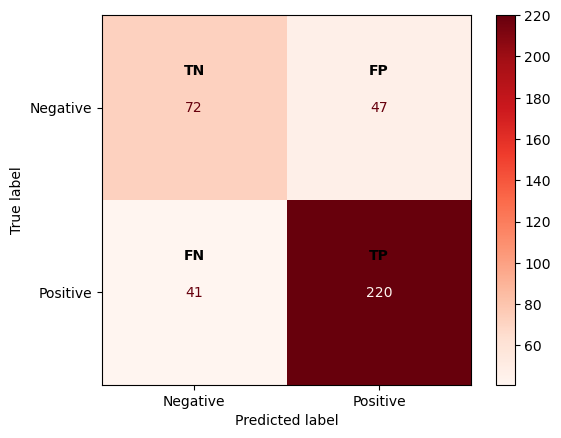

In [122]:
# Mendefinisikan plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cf_before, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Reds', values_format='')

# Memposisikan label FN, FP, TN, dan TP pada confusion matrix
for i in range(2):
    for j in range(2):
        cell_value = disp.confusion_matrix[i, j]
        if i == 0 and j == 0:
            plt.text(j, i - 0.2, 'TN', ha='center', va='center', color='black', fontweight='bold')
        elif i == 0 and j == 1:
            plt.text(j, i - 0.2, 'FP', ha='center', va='center', color='black', fontweight='bold')
        elif i == 1 and j == 0:
            plt.text(j, i - 0.2, 'FN', ha='center', va='center', color='black', fontweight='bold')
        elif i == 1 and j == 1:
            plt.text(j, i - 0.2, 'TP', ha='center', va='center', color='black', fontweight='bold')

# Show the plot
plt.show()

## **2. Confusion Matrix setelah Tuning**

In [124]:
# library
from sklearn.metrics import confusion_matrix, classification_report

# Mendefinisikan nilai prediksi dari model
y_pred_prob = random_search_rf.predict_proba(X_test)[:, 1]

# Menginput threshold terbaik
threshold = 0.8
y_pred = (y_pred_prob >= threshold).astype(int)

# Mendefinisikan variabel confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan nilai dari masing-masing FN, FP, TN, dan TP pada confusion matrix
cm


array([[114,   5],
       [188,  73]], dtype=int64)

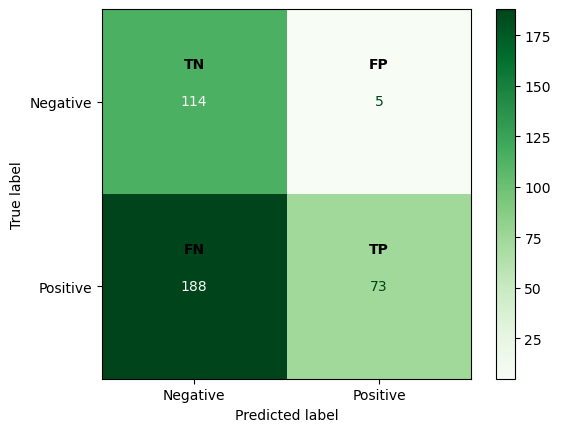

In [125]:
# Mendefinisikan plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Greens', values_format='')

# Memposisikan label FN, FP, TN, dan TP pada confusion matrix
for i in range(2):
    for j in range(2):
        cell_value = disp.confusion_matrix[i, j]
        if i == 0 and j == 0:
            plt.text(j, i - 0.2, 'TN', ha='center', va='center', color='black', fontweight='bold')
        elif i == 0 and j == 1:
            plt.text(j, i - 0.2, 'FP', ha='center', va='center', color='black', fontweight='bold')
        elif i == 1 and j == 0:
            plt.text(j, i - 0.2, 'FN', ha='center', va='center', color='black', fontweight='bold')
        elif i == 1 and j == 1:
            plt.text(j, i - 0.2, 'TP', ha='center', va='center', color='black', fontweight='bold')

# plot
plt.show()

# **Penjelasan**

- **Biaya Pengeluaran Perusahaan Sebelum Menggunakan Modeling Machine Learning (ML)**
    - Permasalahan yang ingin dipecahkan dalam hal ini merupakan bagaimana cara Perusahaan Perbankan untuk melakukan manajemen serta meminimalisir pengeluaran ketika terjadi kondisi seorang nasabah yang sebelumnya diprediksi akan melakukan deposit namun secara aktual calon Nasabah tersebut tidak melakukan deposit sehingga Perusahaan telah mengeluarkan cost untuk memberikan layanan terhadap calon Nasabah untuk meyakinkan Nasabah tersebut melakukan deposit.
    - Jika dilihat dari nilai FP (False Positive) pada Confusion Matrix sebelum menggunakan modeling maka terdapat sejumlah 47 calon Nasabah yang diprediksi akan melakukan deposit namun aktualnya tidak melakukan deposit / salah prediksi. Maka biaya yang telah dikeluarkan oleh Perusahaan pada saat sedang memprediksi calon Nasabah tersebut adalah sebesar 27 x $50 = $ 2350

- **Biaya Pengeluaran Perusahaan setelah Menggunakan Modeling Machine Learning (ML)**
    - Setelah menggunakan modeling dan model terbaik dengan menggunakan random forest. Maka penggunaan model tersebut dapat menurunkan biaya pengeluaran FP pada Perusahaan tersebut
    - Jika dilihat dari nilai FP pada Confusion Matrix setelah menggunakan modeling + Threshold terbaik maka jumlah calon Nasabah yang diprediksi akan melakukan deposit namun aktualnya tidak melakukan deposit menjadi turun drastis yaitu hanya 5 calon Nasabah saja jika dibandingkan jumlah calon Nasabah sebelum dilakukan modeling yaitu sejumlah 47 calon Nasabah. Maka biaya yang dikeluarkan Perusahaan pada saat salah prediksi setelah dilakukan modeling adalah hanya sebesar 5 x $50 = $250.

- **Rekomendasi**
    - Rekomendasi untuk Perusahaan Perbankan adalah untuk terus memperbarui dan meningkatkan model machine learning mereka secara berkala. Selain itu, penting untuk terus memantau performa model dan menyesuaikan threshold prediksi sesuai dengan kebutuhan bisnis. Dengan melakukan hal ini, Perusahaan dapat terus mengoptimalkan pengeluaran mereka dan meningkatkan efisiensi operasional.